In [1]:
### Import packages

## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
from seaborn import set_style

## This sets the plot style
## to have a grid on a white background
set_style("whitegrid")

## For converting date column to datetime format

from datetime import date
from datetime import datetime

Read in the data from .csv file.

In [2]:
borneo_rain = pd.read_csv('weather_tuanan_2003-Apr2020.csv')

In [3]:
borneo_rain.columns

Index(['date', 'year', 'month', 'month2', 'day', 'total_rain_camp',
       'total_rain_post', 'min_temp', 'max_temp', 'thunder', 'smoke'],
      dtype='object')

In [4]:
borneo_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6424 entries, 0 to 6423
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             6424 non-null   int64 
 1   year             6424 non-null   int64 
 2   month            6424 non-null   int64 
 3   month2           6424 non-null   object
 4   day              6424 non-null   int64 
 5   total_rain_camp  6424 non-null   object
 6   total_rain_post  6424 non-null   object
 7   min_temp         6424 non-null   object
 8   max_temp         6424 non-null   object
 9   thunder          6424 non-null   object
 10  smoke            6424 non-null   object
dtypes: int64(4), object(7)
memory usage: 552.2+ KB


# Cleaning the data and adding rain_tomorrow:

Start by making rain_tomorrow feature by looping through and taking nonzero total_rain_camp as 1, 'no data' as 'no data', and zero total_rain_camp as 0. Make final entry 'no data'.

Next, convert date information to datetime style for conversion to_datetime(). 

Finally, go through each feature and drop all 'no data' rows!

The cleaned data frame borneo_full_clean is all the features taken only in the rows where all the features have data. This leaves out the first several years where no total_rain_post, thunder, or smoke were recorded.

In [5]:
borneo_rain_copy = borneo_rain.copy()

## Define new column for rain_tomorrow

borneo_rain_copy['rain_tomorrow'] = '0'

## Loop through total_rain_camp and assign values for rain_tomorrow

for i in borneo_rain_copy.index:
    if i < len(borneo_rain_copy.index)-1:
        if borneo_rain_copy.total_rain_camp[i+1] == '0':
            borneo_rain_copy.rain_tomorrow[i] = '0'
        elif borneo_rain_copy.total_rain_camp[i+1] == 'no data':
            borneo_rain_copy.rain_tomorrow[i] = 'no data'
        else:
            borneo_rain_copy.rain_tomorrow[i] = '1'

## Assign no data for dinal rain_tomorrow as the next day is out of the data set            
            
borneo_rain_copy.rain_tomorrow[len(borneo_rain_copy.index)] = 'no data'

<ipython-input-5-d2790eaf500a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  borneo_rain_copy.rain_tomorrow[i] = '0'
<ipython-input-5-d2790eaf500a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  borneo_rain_copy.rain_tomorrow[i] = '1'
<ipython-input-5-d2790eaf500a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  borneo_rain_copy.rain_tomorrow[i] = 'no data'
<ipython-input-5-d2790eaf500a>:20: SettingWithCopyWarning: 
A value is

In [6]:
## Function which converts yyyymmdd integer date format to yyyy-mm-dd string format

def inttodate(argdate: int) -> date:

    year = int(argdate / 10000)
    month = int((argdate % 10000) / 100)
    day = int(argdate % 100)

    return date(year, month, day)

In [7]:
## Convert dates to integers

borneo_rain_copy['date'] = pd.to_numeric(borneo_rain_copy['date'], downcast="integer")

In [8]:
## Convert date integers to datetime objects

for i in borneo_rain_copy.index:
    borneo_rain_copy.date[i] = inttodate(borneo_rain_copy.date[i])

<ipython-input-8-0bb59b79891a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  borneo_rain_copy.date[i] = inttodate(borneo_rain_copy.date[i])


In [9]:
## Make separate columns for year, month, and day to use in decision trees

borneo_rain_copy['date'] = pd.to_datetime(borneo_rain_copy['date'])
borneo_rain_copy['year'] = borneo_rain_copy['date'].dt.year
borneo_rain_copy['month'] = borneo_rain_copy['date'].dt.month
borneo_rain_copy['day'] = borneo_rain_copy['date'].dt.day

In [10]:
borneo_rain_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6424 entries, 0 to 6423
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             6424 non-null   datetime64[ns]
 1   year             6424 non-null   int64         
 2   month            6424 non-null   int64         
 3   month2           6424 non-null   object        
 4   day              6424 non-null   int64         
 5   total_rain_camp  6424 non-null   object        
 6   total_rain_post  6424 non-null   object        
 7   min_temp         6424 non-null   object        
 8   max_temp         6424 non-null   object        
 9   thunder          6424 non-null   object        
 10  smoke            6424 non-null   object        
 11  rain_tomorrow    6424 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 602.4+ KB


Go through each column and remove rows with 'no data' entries from the dataframe.

In [11]:
df1 = borneo_rain_copy.drop(borneo_rain_copy.loc[borneo_rain_copy.total_rain_camp == 'no data'].index)

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6400 entries, 0 to 6423
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             6400 non-null   datetime64[ns]
 1   year             6400 non-null   int64         
 2   month            6400 non-null   int64         
 3   month2           6400 non-null   object        
 4   day              6400 non-null   int64         
 5   total_rain_camp  6400 non-null   object        
 6   total_rain_post  6400 non-null   object        
 7   min_temp         6400 non-null   object        
 8   max_temp         6400 non-null   object        
 9   thunder          6400 non-null   object        
 10  smoke            6400 non-null   object        
 11  rain_tomorrow    6400 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 650.0+ KB


In [12]:
df2 = df1.drop(df1.loc[df1.total_rain_post == 'no data'].index)

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2696 entries, 3714 to 6423
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             2696 non-null   datetime64[ns]
 1   year             2696 non-null   int64         
 2   month            2696 non-null   int64         
 3   month2           2696 non-null   object        
 4   day              2696 non-null   int64         
 5   total_rain_camp  2696 non-null   object        
 6   total_rain_post  2696 non-null   object        
 7   min_temp         2696 non-null   object        
 8   max_temp         2696 non-null   object        
 9   thunder          2696 non-null   object        
 10  smoke            2696 non-null   object        
 11  rain_tomorrow    2696 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 273.8+ KB


In [13]:
df3 = df2.drop(df2.loc[df2.min_temp == 'no data'].index)

df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2589 entries, 3714 to 6423
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             2589 non-null   datetime64[ns]
 1   year             2589 non-null   int64         
 2   month            2589 non-null   int64         
 3   month2           2589 non-null   object        
 4   day              2589 non-null   int64         
 5   total_rain_camp  2589 non-null   object        
 6   total_rain_post  2589 non-null   object        
 7   min_temp         2589 non-null   object        
 8   max_temp         2589 non-null   object        
 9   thunder          2589 non-null   object        
 10  smoke            2589 non-null   object        
 11  rain_tomorrow    2589 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 262.9+ KB


In [14]:
df4 = df3.drop(df3.loc[df3.max_temp == 'no data'].index)

df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2587 entries, 3714 to 6423
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             2587 non-null   datetime64[ns]
 1   year             2587 non-null   int64         
 2   month            2587 non-null   int64         
 3   month2           2587 non-null   object        
 4   day              2587 non-null   int64         
 5   total_rain_camp  2587 non-null   object        
 6   total_rain_post  2587 non-null   object        
 7   min_temp         2587 non-null   object        
 8   max_temp         2587 non-null   object        
 9   thunder          2587 non-null   object        
 10  smoke            2587 non-null   object        
 11  rain_tomorrow    2587 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 262.7+ KB


In [15]:
df5 = df4.drop(df4.loc[df4.thunder == 'no data'].index)

df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2515 entries, 3714 to 6423
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             2515 non-null   datetime64[ns]
 1   year             2515 non-null   int64         
 2   month            2515 non-null   int64         
 3   month2           2515 non-null   object        
 4   day              2515 non-null   int64         
 5   total_rain_camp  2515 non-null   object        
 6   total_rain_post  2515 non-null   object        
 7   min_temp         2515 non-null   object        
 8   max_temp         2515 non-null   object        
 9   thunder          2515 non-null   object        
 10  smoke            2515 non-null   object        
 11  rain_tomorrow    2515 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 255.4+ KB


In [16]:
df6 = df5.drop(df5.loc[df5.smoke == 'no data'].index)

df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2509 entries, 3714 to 6423
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             2509 non-null   datetime64[ns]
 1   year             2509 non-null   int64         
 2   month            2509 non-null   int64         
 3   month2           2509 non-null   object        
 4   day              2509 non-null   int64         
 5   total_rain_camp  2509 non-null   object        
 6   total_rain_post  2509 non-null   object        
 7   min_temp         2509 non-null   object        
 8   max_temp         2509 non-null   object        
 9   thunder          2509 non-null   object        
 10  smoke            2509 non-null   object        
 11  rain_tomorrow    2509 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 254.8+ KB


In [17]:
borneo_full_clean = df6.drop(df6.loc[df6.rain_tomorrow == 'no data'].index)

borneo_full_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2504 entries, 3714 to 6423
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             2504 non-null   datetime64[ns]
 1   year             2504 non-null   int64         
 2   month            2504 non-null   int64         
 3   month2           2504 non-null   object        
 4   day              2504 non-null   int64         
 5   total_rain_camp  2504 non-null   object        
 6   total_rain_post  2504 non-null   object        
 7   min_temp         2504 non-null   object        
 8   max_temp         2504 non-null   object        
 9   thunder          2504 non-null   object        
 10  smoke            2504 non-null   object        
 11  rain_tomorrow    2504 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 254.3+ KB


In [18]:
## Convert total rain and temperature columns to floats

borneo_full_clean['total_rain_camp'] = pd.to_numeric(borneo_full_clean['total_rain_camp'], downcast="float")

borneo_full_clean['total_rain_post'] = pd.to_numeric(borneo_full_clean['total_rain_post'], downcast="float")

borneo_full_clean['min_temp'] = pd.to_numeric(borneo_full_clean['min_temp'], downcast="float")

borneo_full_clean['max_temp'] = pd.to_numeric(borneo_full_clean['max_temp'], downcast="float")

In [19]:
## One hot encode thunder and smoke

borneo_full_clean['Thunder'] = 0

borneo_full_clean.Thunder.loc[borneo_full_clean['thunder'] == 'present'] = 1 

borneo_full_clean['Smoke'] = 0

borneo_full_clean.Smoke.loc[borneo_full_clean['smoke'] == 'present'] = 1

C:\Users\shred\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [20]:
borneo_full_clean.columns

Index(['date', 'year', 'month', 'month2', 'day', 'total_rain_camp',
       'total_rain_post', 'min_temp', 'max_temp', 'thunder', 'smoke',
       'rain_tomorrow', 'Thunder', 'Smoke'],
      dtype='object')

# Run random forest classifier:

Make train test split and stratify. 

Run random forest under stratified cross validation, taking accuracy score.

Predict with random forest classifier which has max depth corresponding to highest accuracy.

In [21]:
X = borneo_full_clean[['year', 'month','day', 'total_rain_camp',
       'total_rain_post', 'min_temp', 'max_temp','Thunder', 'Smoke']]

y = borneo_full_clean['rain_tomorrow']

In [22]:
## Import packages for cross validation

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.base import clone
## Accuracy
from sklearn.metrics import accuracy_score
## Precision
from sklearn.metrics import precision_score
## Recall
from sklearn.metrics import recall_score

In [23]:
## Make train-test split

X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size = .25,
                                                 random_state = 614,
                                                 shuffle = True,
                                                 stratify = y)

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
## Perform cross-validation to find the optimal
## max_depth for one of the three performance measures


## Sample Answer
kfold = StratifiedKFold(n_splits=5,shuffle = True,random_state=440)

X_train_copy = X_train.copy()

# n will be the maximum max_depth I consider
n = 20

accs = np.zeros((5,n))


for j in range(1,n+1):
    rf = RandomForestClassifier(n_estimators = 500,max_depth=j, random_state = 440)
    
    i = 0
    for train_index,test_index in kfold.split(X_train_copy,y_train):
        X_train_train, X_train_test = X_train_copy.iloc[train_index],X_train_copy.iloc[test_index]
        y_train_train, y_train_test = y_train.iloc[train_index],y_train.iloc[test_index]

        rf_clone = clone(rf)
        rf_clone.fit(X_train_train,y_train_train)
        
        y_predict = rf_clone.predict(X_train_test)
        accs[i,j-1] = accuracy_score(y_train_test,y_predict)
        i = i + 1

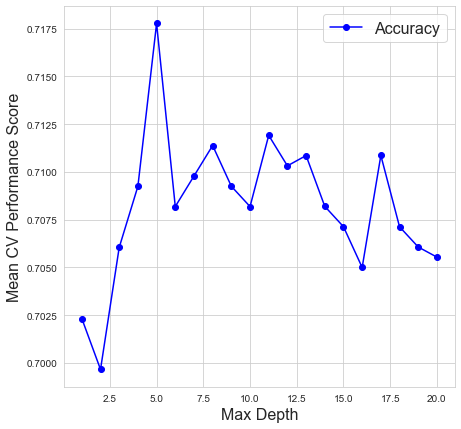

In [28]:
plt.figure(figsize=(7,7))

plt.plot(range(1,n+1), np.mean(accs,axis=0),'b-o', label="Accuracy")

plt.ylabel("Mean CV Performance Score",fontsize=16)
plt.xlabel("Max Depth",fontsize=16)

plt.legend(fontsize=16)

plt.show()

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
#Choosing a final model with max depth 5
rff = RandomForestClassifier(n_estimators = 500,max_depth=5, random_state = 440)

rff_clone = clone(rff)
rff_clone.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=500, random_state=440)

In [31]:
y_predict = rff_clone.predict(X_test)

print('The accuracy score is', accuracy_score(y_test,y_predict))

The accuracy score is 0.7028753993610224


In [32]:
confusion_matrix(y_test, y_predict)

array([[107, 137],
       [ 49, 333]], dtype=int64)

In [33]:
names = []
scores = []
for name, score in zip(X_train_copy.columns,rff_clone.feature_importances_):
    names.append(name)
    scores.append(np.round(score,4))
    
score_df = pd.DataFrame({'feature':names,'importance_score':scores})

score_df.sort_values('importance_score',ascending=False)

,feature,importance_score
4,total_rain_post,0.2763
3,total_rain_camp,0.2111
1,month,0.1143
5,min_temp,0.1085
8,Smoke,0.0743
7,Thunder,0.0742
2,day,0.0603
0,year,0.0445
6,max_temp,0.0364
